## U.S. International Trade in Goods and Services, monthly, 1992 - Present
A [CNBC article titled "US trade deficit rises to near 9½-year high"](https://www.cnbc.com/2018/04/05/us-trade-deficit-rises.html) published on April 5, 2018 begins as follows:

> The U.S. trade deficit increased to a near 9½-year high in February as both exports and imports rose to record highs, but the shortfall with China narrowed sharply.

> The Commerce Department said on Thursday the trade gap rose 1.6 percent to \$57.6 billion. That was the highest level since October 2008 and followed a slightly downwardly revised \$56.7 billion shortfall in January.

The following python code verifies these numbers via data posted on the U.S. Census website.

In [102]:
import pandas as pd
import math
xx = pd.read_excel('https://www.census.gov/foreign-trade/statistics/historical/exhibit_history.xls', skiprows=4)
xx.columns = ('Month','Balance','Balance Goods','Balance Svcs',
             'Exports','Exports Goods','Exports Svcs',
             'Imports','Imports Goods','Imports Svcs')
for i in range(0,xx.shape[0]):
    if (i % 14 == 0):
        iyear = xx.loc[i,'Month']
        xx.loc[i,'Month'] = ''
    if (i % 14 == 1):
        xx.loc[i,'Month'] = ''
    xx.loc[i,'iYear'] = iyear
    xx.loc[i,'iMonth'] = (i % 14) - 1
    #xx.loc[i,'Year'] = xx.loc[i,'iYear'].astype(str).astype(float) + (xx.loc[i,'iMonth'].astype(float)-1) / 12
    if math.isnan(pd.to_numeric(iyear)):
        xx.loc[i,'Month'] = ''
yy = xx[xx['Month'] != ""]
yy = yy[yy['Balance'].notnull()]
#yy.loc[:,['Balance','Exports','Imports']] = yy.loc[:,['Balance','Exports','Imports']].astype(float)
yy.loc[:,'Balance'] = yy.loc[:,'Balance'].astype(float)
yy.loc[:,'Exports'] = yy.loc[:,'Exports'].astype(float)
yy.loc[:,'Imports'] = yy.loc[:,'Imports'].astype(float)
yy.loc[:,'iYear'] = yy.loc[:,'iYear'].astype(int)
yy.loc[:,'iMonth'] = yy.loc[:,'iMonth'].astype(int)
yy.loc[:,'Year'] = yy.loc[:,'iYear'] + (yy.loc[:,'iMonth']-1) / 12
#print(yy.dtypes)
yy.loc[:,['Balance','Exports','Imports']] /= 1000
zz = yy[yy['iYear'] >= 2008]
arrays = [['','Goods & Svcs','Goods','Svcs','Goods & Svcs','Goods','Svcs','Goods & Svcs','Goods','Svcs','','',''],
         ['Month','Balance','Balance','Balance','Exports','Exports','Exports','Imports','Imports','Imports','iYear','iMonth','Year']]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples)
zz.columns = index
#print(zz[['iYear','iMonth','Balance','Imports','Exports']].head(14))
#print(zz[['iYear','iMonth','Balance','Imports','Exports']].tail(14))
print(zz.iloc[:,[10,11,1,4,7]].head(24))
print(zz.iloc[:,[10,11,1,4,7]].tail(25)) #UPDATE

                 Goods & Svcs                  
    iYear iMonth      Balance  Exports  Imports
226  2008      1      -61.139  150.167  211.306
227  2008      2      -64.349  152.433  216.781
228  2008      3      -60.065  152.089  212.154
229  2008      4      -63.527  156.757  220.284
230  2008      5      -62.152  158.799  220.950
231  2008      6      -60.670  163.608  224.279
232  2008      7      -66.841  165.379  232.220
233  2008      8      -62.107  162.659  224.766
234  2008      9      -60.500  153.586  214.086
235  2008     10      -60.190  151.364  211.554
236  2008     11      -44.724  142.400  187.124
237  2008     12      -42.463  132.372  174.835
240  2009      1      -37.842  125.294  163.136
241  2009      2      -27.767  127.342  155.109
242  2009      3      -29.162  125.998  155.161
243  2009      4      -29.706  124.389  154.095
244  2009      5      -25.373  126.220  151.593
245  2009      6      -26.366  128.891  155.257
246  2009      7      -32.790  130.847  

As can be seen above, the numbers in the article are accurate.  The trade deficit in goods and services rose from $56.7 billion in January to $57.6 billion in February.  This is the highest level since it reached $60.2 billion in October of 2008.  In any event, the following code creates a plot of the U.S. trade in goods and services since 1992.

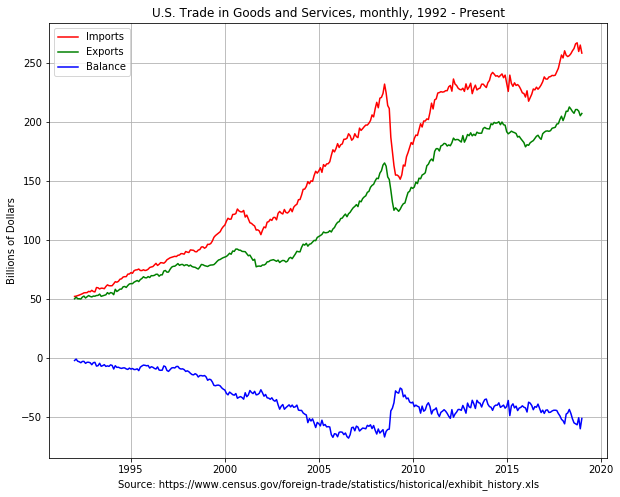

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
ax.grid()
ax.set_title('U.S. Trade in Goods and Services, monthly, 1992 - Present')
ax.set_xlabel('Source: https://www.census.gov/foreign-trade/statistics/historical/exhibit_history.xls')
ax.set_ylabel('Billions of Dollars')
#ax.set_xlim([2008,2018])
#ax.set_ylim([-5,6])
#ax.set_yticks(range(-5,6))
ax.plot(yy.Year,yy.Imports,'r')
ax.plot(yy.Year,yy.Exports,'g')
ax.plot(yy.Year,yy.Balance,'b-')
#ax.plot(qq.Year,qq.Change1y,'r-')
#ax.plot(qq.Year,qq.Change1q,'g-')
#ax.axhline(y=3, color='k', linestyle='--')
ax.legend()
fig.savefig('trade92_1901.png') # UPDATE

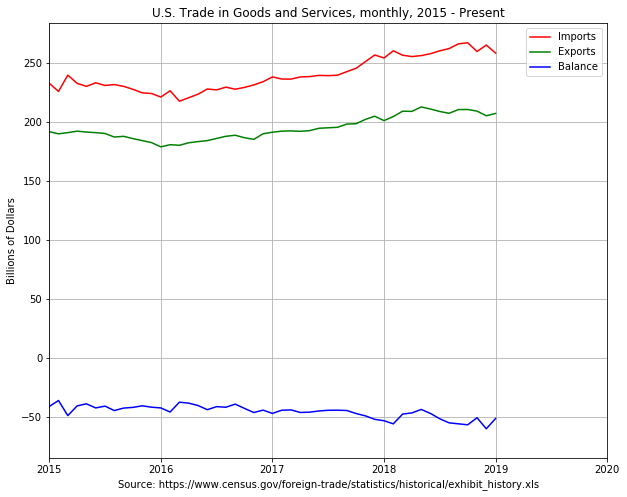

In [104]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
ax.grid()
ax.set_title('U.S. Trade in Goods and Services, monthly, 2015 - Present')
ax.set_xlabel('Source: https://www.census.gov/foreign-trade/statistics/historical/exhibit_history.xls')
ax.set_ylabel('Billions of Dollars')
ax.set_xlim([2015,2020])
#ax.set_ylim([-5,6])
#ax.set_yticks(range(-5,6))
ax.plot(yy.Year,yy.Imports,'r')
ax.plot(yy.Year,yy.Exports,'g')
ax.plot(yy.Year,yy.Balance,'b-')
#ax.plot(qq.Year,qq.Change1y,'r-')
#ax.plot(qq.Year,qq.Change1q,'g-')
#ax.axhline(y=3, color='k', linestyle='--')
ax.legend()
fig.savefig('trade15_1901.png') # UPDATE

## U.S. International Trade in Goods and Services, annually, 1960 - Present
Another file on the Census website gives annual trade data since 1960.  The following code reads and outputs data from that file.

In [105]:
import pandas as pd
xx = pd.read_excel('https://www.census.gov/foreign-trade/statistics/historical/gands.xls', skiprows=5)
yy = xx.iloc[0:59,0:10] # UPDATE (0:59=1960-2018)
arrays = [[   '','Goods & Svcs','Goods','Services','Goods & Svcs','Goods','Services','Goods & Svcs','Goods','Services'],
         ['Year','Balance','Balance','Balance','Exports','Exports','Exports','Imports','Imports','Imports']]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples)
yy.columns = index
yy.iloc[:,1:10] /= 1000
yy = yy.iloc[:,[0,2,5,8,1,4,7]]
print("U.S. International Trade in Goods and Services, 1960 - Present")
print(yy)

U.S. International Trade in Goods and Services, 1960 - Present
            Goods                     Goods & Svcs                    
    Year  Balance   Exports   Imports      Balance   Exports   Imports
0   1960    4.892    19.650    14.758        3.508    25.940    22.432
1   1961    5.571    20.108    14.537        4.195    26.403    22.208
2   1962    4.521    20.781    16.260        3.370    27.722    24.352
3   1963    5.224    22.272    17.048        4.210    29.620    25.410
4   1964    6.801    25.501    18.700        6.022    33.341    27.319
5   1965    4.951    26.461    21.510        4.664    35.285    30.621
6   1966    3.817    29.310    25.493        2.939    38.926    35.987
7   1967    3.800    30.666    26.866        2.604    41.333    38.729
8   1968    0.635    33.626    32.991        0.250    45.543    45.293
9   1969    0.607    36.414    35.807        0.091    49.220    49.129
10  1970    2.603    42.469    39.866        2.254    56.640    54.386
11  1971   -2.

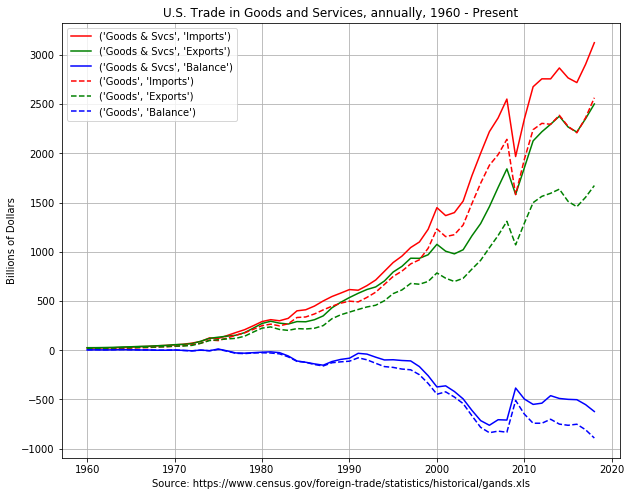

In [106]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
ax.grid()
ax.set_title('U.S. Trade in Goods and Services, annually, 1960 - Present')
ax.set_xlabel('Source: https://www.census.gov/foreign-trade/statistics/historical/gands.xls')
ax.set_ylabel('Billions of Dollars')
#ax.set_xlim([2008,2018])
#ax.set_ylim([-5,6])
#ax.set_yticks(range(-5,6))
ax.plot(yy.iloc[:,0],yy.iloc[:,6],'r')
ax.plot(yy.iloc[:,0],yy.iloc[:,5],'g')
ax.plot(yy.iloc[:,0],yy.iloc[:,4],'b')
ax.plot(yy.iloc[:,0],yy.iloc[:,3],'r--')
ax.plot(yy.iloc[:,0],yy.iloc[:,2],'g--')
ax.plot(yy.iloc[:,0],yy.iloc[:,1],'b--')
#ax.plot(yy.Year,yy.Exports,'g')
#ax.plot(yy.Year,yy.Balance,'b-')
#ax.plot(qq.Year,qq.Change1y,'r-')
#ax.plot(qq.Year,qq.Change1q,'g-')
#ax.axhline(y=3, color='k', linestyle='--')
ax.legend()
fig.savefig('trade60_18.png') # UPDATE

### Read latest GDP figures from Bureau of Economic Analysis website
One problem with the prior graph is that it shows U.S trade as measured in billions of dollars.  Over the years, the effect of each dollar lessens as the GDP grows.  For this reason, it's instructive to look at trade data as a percent of GDP.  The following code reads both the annual and quarterly GDP figures from the Bureau of Economic Analysis website and calculates the percent change between successive periods.

In [107]:
import pandas as pd
#xx = pd.read_excel('https://www.bea.gov/national/xls/gdplev.xlsx', skiprows=7)
xx = pd.read_csv('gdplev.csv', skiprows=7) #Save GDP file locally as a CSV file

aa = xx.iloc[0:90, 0:3] # UPDATE (0:90 = 2018) # was 0:89
aa.columns = ['Year','Current $bil','Chained 2009 $bil']
qq = xx.iloc[0:288, 4:7] #UPDATE (0:288 = 2018Q4 # was 0:287
qq.columns = ['Quarter','Current $bil','Chained 2009 $bil']
# Must convert strings to floats if read from CSV file
aa['Chained 2009 $bil'] = aa['Chained 2009 $bil'].str.replace(',', '')
qq['Chained 2009 $bil'] = qq['Chained 2009 $bil'].str.replace(',', '')
aa['Chained 2009 $bil'] = aa['Chained 2009 $bil'].astype(float)
qq['Chained 2009 $bil'] = qq['Chained 2009 $bil'].astype(float)
# Add to code from gdp_growth ipynb
aa['Current $bil'] = aa['Current $bil'].str.replace(',', '')
aa['Current $bil'] = aa['Current $bil'].astype(float)

aa['Pct_Change'] = aa.loc[:,'Chained 2009 $bil'].pct_change()*100
qq['Pct_Change'] = qq.loc[:,'Chained 2009 $bil'].pct_change()*100
print(aa.head())
print(aa.tail(18))

     Year  Current $bil  Chained 2009 $bil  Pct_Change
0  1929.0         104.6             1109.4         NaN
1  1930.0          92.2             1015.1   -8.500090
2  1931.0          77.4              950.0   -6.413161
3  1932.0          59.5              827.5  -12.894737
4  1933.0          57.2              817.3   -1.232628
      Year  Current $bil  Chained 2009 $bil  Pct_Change
72  2001.0       10581.8            13262.1    0.998401
73  2002.0       10936.4            13493.1    1.741806
74  2003.0       11458.2            13879.1    2.860721
75  2004.0       12213.7            14406.4    3.799238
76  2005.0       13036.6            14912.5    3.513022
77  2006.0       13814.6            15338.3    2.855323
78  2007.0       14451.9            15626.0    1.875697
79  2008.0       14712.8            15604.7   -0.136311
80  2009.0       14448.9            15208.8   -2.537056
81  2010.0       14992.1            15598.8    2.564305
82  2011.0       15542.6            15840.7    1.55076

### Output and plot trade data as percentage of GDP
The following code then displays and plots the trade data as a percent of GDP.

In [108]:
aa60 = aa[aa.iloc[:,0] >= 1960]
aa60.index = range(0,aa60.shape[0])
yy['GDP'] = 1
yy.iloc[:,7] = aa60.loc[:,'Current $bil']
#print(yy)
print(yy.info())
yy.iloc[:,1] *= (100/yy.iloc[:,7])
yy.iloc[:,2] *= (100/yy.iloc[:,7])
yy.iloc[:,3] *= (100/yy.iloc[:,7])
yy.iloc[:,4] *= (100/yy.iloc[:,7])
yy.iloc[:,5] *= (100/yy.iloc[:,7])
yy.iloc[:,6] *= (100/yy.iloc[:,7])
#print(yy.to_string(index=False))
print(yy.iloc[:,0:7])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 8 columns):
(, Year)                   59 non-null object
(Goods, Balance)           59 non-null float64
(Goods, Exports)           59 non-null float64
(Goods, Imports)           59 non-null float64
(Goods & Svcs, Balance)    59 non-null float64
(Goods & Svcs, Exports)    59 non-null float64
(Goods & Svcs, Imports)    59 non-null float64
(GDP, )                    59 non-null float64
dtypes: float64(7), object(1)
memory usage: 3.8+ KB
None
             Goods                      Goods & Svcs                      
    Year   Balance   Exports    Imports      Balance    Exports    Imports
0   1960  0.901917  3.622788   2.720870     0.646755   4.782448   4.135693
1   1961  0.990928  3.576663   2.585735     0.746176   4.696371   3.950196
2   1962  0.748634  3.441133   2.692499     0.558039   4.590495   4.032456
3   1963  0.819451  3.493647   2.674196     0.660392   4.646275   3.985882
4   1964  0.9935

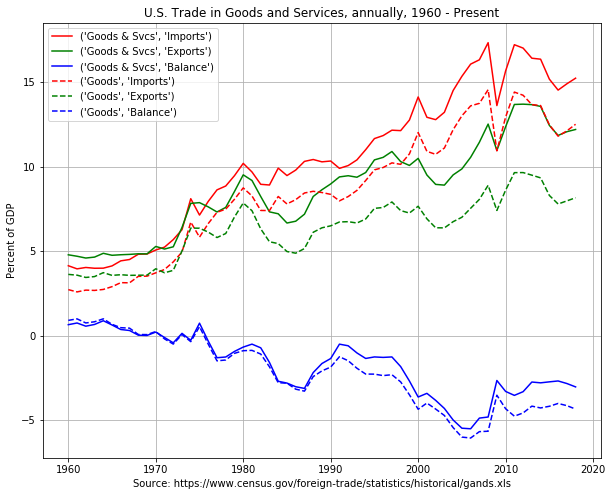

In [109]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
ax.grid()
ax.set_title('U.S. Trade in Goods and Services, annually, 1960 - Present')
ax.set_xlabel('Source: https://www.census.gov/foreign-trade/statistics/historical/gands.xls')
ax.set_ylabel('Percent of GDP')
#ax.set_xlim([2008,2018])
#ax.set_ylim([-5,6])
#ax.set_yticks(range(-5,6))
ax.plot(yy.iloc[:,0],yy.iloc[:,6],'r')
ax.plot(yy.iloc[:,0],yy.iloc[:,5],'g')
ax.plot(yy.iloc[:,0],yy.iloc[:,4],'b')
ax.plot(yy.iloc[:,0],yy.iloc[:,3],'r--')
ax.plot(yy.iloc[:,0],yy.iloc[:,2],'g--')
ax.plot(yy.iloc[:,0],yy.iloc[:,1],'b--')
#ax.plot(yy.Year,yy.Exports,'g')
#ax.plot(yy.Year,yy.Balance,'b-')
#ax.plot(qq.Year,qq.Change1y,'r-')
#ax.plot(qq.Year,qq.Change1q,'g-')
#ax.axhline(y=3, color='k', linestyle='--')
ax.legend()
fig.savefig('trade60_18gdp.png') # UPDATE

### List Countries with which the U.S. has the Largest Deficit, Exports, and Imports in Goods

In [110]:
xx = pd.read_excel('https://www.census.gov/foreign-trade/balance/country.xlsx', skiprows=0)
yy = xx[xx['CTY_CODE'] > 19]
yy = yy[yy['year'] == 2018] # UPDATE TO LAST FULL YEAR
yy['Balance'] = yy['EYR'] - yy['IYR']
yy = yy[['year','CTYNAME','Balance','EYR','IYR']]
yy.columns = ['Year','Country','Balance','Exports','Imports']
yy.iloc[:,[2,3,4]] /= 1000
yy['Year'] = yy['Year'].astype(int)
zz = yy.sort_values('Balance')
print("\nCountries with which the U.S. has the Largest Deficits in Goods ($billion)\n")
print(zz.head(20))
zz = yy.sort_values('Exports',ascending=False)
print("\nCountries with which the U.S. has the Largest Exports in Goods ($billion)\n")
print(zz.head(20))
zz = yy.sort_values('Imports',ascending=False)
print("\nCountries with which the U.S. has the Largest Imports in Goods ($billion)\n")
print(zz.head(20))


Countries with which the U.S. has the Largest Deficits in Goods ($billion)

      Year       Country     Balance     Exports     Imports
4892  2018         China -419.162002  120.341426  539.503428
620   2018        Mexico  -81.517381  265.010357  346.527739
2527  2018       Germany  -68.250334   57.653808  125.904142
5087  2018         Japan  -67.629532   74.966716  142.596248
2303  2018       Ireland  -46.782205   10.686901   57.469106
4522  2018       Vietnam  -39.528312    9.683740   49.212053
3405  2018         Italy  -31.568966   23.153302   54.722268
4613  2018      Malaysia  -26.519236   12.864625   39.383861
4298  2018         India  -21.287394   33.120080   54.407474
558   2018        Canada  -19.753540  298.727543  318.481083
4494  2018      Thailand  -19.312134   12.588291   31.900425
2720  2018   Switzerland  -18.907812   22.230660   41.138472
4982  2018  Korea, South  -17.946373   56.344306   74.290679
2492  2018        France  -16.195470   36.326329   52.521799
5052  20

### List Balance in Goods and Services by Selected Countries - BOP Basis

In [111]:
xx = pd.read_excel('https://www.census.gov/foreign-trade/Press-Release/current_press_release/exh20.xls', skiprows=5)
#xx.columns = ['Country','2016Q3','2016Q4','2017Q1','2017Q2','2017Q3','2017Q4','2015','2016','2017']
xx.columns = ['Country','2016Q4','2017Q1','2017Q2','2017Q3','2017Q4','2018Q1','2015','2016','2017']
xx.columns = ['Country','2017Q3','2017Q4','2018Q1','2018Q2','2018Q3','2018Q4','2016','2017','2018']
xx = xx.iloc[0:16,:]
xx.iloc[:,1:10] /= 1000
yy = xx.iloc[:,[0,7,8,9]]
print("\nAnnual Balance in Goods and Services by Selected Countries - BOP Basis ($billion)\n")
print(yy)


Annual Balance in Goods and Services by Selected Countries - BOP Basis ($billion)

                Country     2016     2017     2018
0                Brazil   21.555   28.479   30.063
1                Canada    7.406     2.76    1.211
2                 China -308.363 -335.704 -378.734
3                France  -12.515  -13.816    -13.3
4               Germany  -67.072  -66.728  -66.782
5             Hong Kong   28.867    35.06   34.255
6                 India  -29.641  -27.361  -24.294
7                 Italy  -31.196  -34.739  -35.274
8                 Japan  -56.398  -56.588  -57.999
9          Korea, South  -16.612   -9.297   -5.323
10               Mexico  -62.372  -68.745  -78.465
11         Saudi Arabia    9.183    5.292   -3.443
12            Singapore   18.383   20.303   18.087
13               Taiwan   -8.794  -14.396  -13.269
14       United Kingdom   15.066   15.576   19.572
15  All other countries   -9.499  -32.373  -48.411


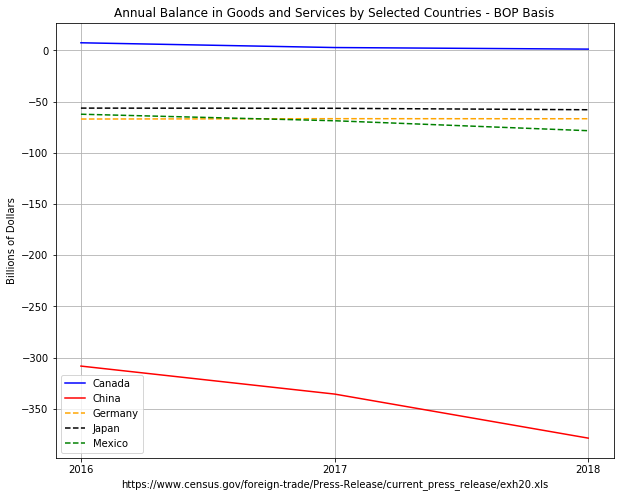

In [112]:
yy.index = yy.iloc[:,0]
yyn = yy.iloc[:,1:4]
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
ax.grid()
ax.set_title('Annual Balance in Goods and Services by Selected Countries - BOP Basis')
ax.set_xlabel('https://www.census.gov/foreign-trade/Press-Release/current_press_release/exh20.xls')
ax.set_ylabel('Billions of Dollars')
ax.plot(yyn.columns,yyn.iloc[1,:],'b')
ax.plot(yyn.columns,yyn.iloc[2,:],'r')
ax.plot(yyn.columns,yyn.iloc[4,:],color='orange',linestyle='dashed')
ax.plot(yyn.columns,yyn.iloc[8,:],'k--')
ax.plot(yyn.columns,yyn.iloc[10,:],'g--')
ax.legend()
fig.savefig("tradenat16_18.png") # UPDATE

In [113]:
yy = xx.iloc[:,[0,1,2,3,4,5,6]]
print("\nQuarterly Balance in Goods and Services by Selected Countries - BOP Basis ($billion)\n")
print(yy)


Quarterly Balance in Goods and Services by Selected Countries - BOP Basis ($billion)

                Country  2017Q3  2017Q4  2018Q1  2018Q2  2018Q3   2018Q4
0                Brazil   7.417   8.192   8.035   7.624   6.975    7.429
1                Canada     2.8   0.439   4.443  -1.274  -3.444    1.485
2                 China -83.153 -88.752 -93.944 -85.943 -96.283 -102.564
3                France  -3.048  -4.294  -3.937  -2.825  -3.499   -3.039
4               Germany -16.544 -17.072 -17.879 -16.131 -16.447  -16.326
5             Hong Kong   8.484   8.307  10.198   8.332   7.661    8.064
6                 India  -6.791   -7.04  -6.152  -6.637  -5.752   -5.753
7                 Italy  -8.664  -9.931  -9.013  -8.224  -8.618   -9.419
8                 Japan -14.698 -14.067 -15.011 -15.298 -13.589  -14.101
9          Korea, South  -2.684  -2.821    -0.3   -1.12  -2.066   -1.837
10               Mexico -16.226  -17.77 -18.026 -17.468 -21.554  -21.418
11         Saudi Arabia   2.844   1.1

Note: The Jupyter Notebook from which this post is generated can be found at [http://econdataus.com/trade1901.ipynb](http://econdataus.com/trade1901.ipynb).  Links to additional Jupyter Notebooks can be found at [http://econdataus.com/jupyter.html](http://econdataus.com/jupyter.html).  Trade data for 1790-2006 can be found at [http://www.econdataus.com/trade06.html](http://www.econdataus.com/trade06.html).